# 🎓 Understanding Random Forest for Phishing Email Classification 🌲📧

### What is Random Forest? 🤔
Random Forest is a **supervised learning algorithm** that consists of multiple decision trees. It is an **ensemble method**, which means that it combines several decision trees to make more accurate predictions.🌲🌲 The algorithm creates a "forest" of trees, and each tree makes its own prediction. The final prediction is based on the **majority vote** (classification) or **average** (regression). This makes Random Forest **robust** and less prone to overfitting, which can be useful in phishing email classification! 🚀

---

### How Random Forest Works 🛠️

1. **Bootstrap Aggregation (Bagging)**: 
   - Multiple decision trees are trained on different **random subsets** of the training data. This reduces the variance and improves the overall performance.
  
2. **Random Feature Selection**: 
   - At each node in the tree, only a **random subset of features** (words in the email) is considered for splitting. This ensures that no single tree dominates, making the model more generalized.
  
3. **Ensemble Voting**: 
   - Each tree in the forest makes a classification (e.g., phishing or safe email), and the final output is decided by a **majority vote**. 🗳️

---
### Advantages of Random Forest for Phishing Email Classification 🌲✨

- **Accurate**: Due to the ensemble of decision trees, Random Forest tends to be more accurate than single-tree models.
- **Resistant to Overfitting**: By using multiple trees and random features, Random Forest is less likely to overfit, even with large feature sets.
- **Feature Importance**: Helps you understand which features (words or patterns in emails) are most important for detecting phishing emails.

### Implementation 🔍
1. **Loading the required libraries** 📚

In [18]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

2. **Loading and splitting the Data** 📥

In [10]:
# Load the save TF-IDF features and labels
x_data = np.load('../feature_x.npy')
y_data = np.load('../y_tf.npy')

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, random_state=0)

3. **Model Initialization** 🤖

The **RandomForestClassifier()** is initialized with its **default parameters** in Scikit-learn. 

- **`n_estimators=100`**: By default, the model creates 100 decision trees. These trees work together in an ensemble to make predictions.
- **`criterion="gini"`**: The default criterion for measuring the quality of splits in the trees is the **Gini impurity**. This is a measure of how "pure" a node is, helping the model decide where to split the data.
- **`max_depth=None`**: The trees grow as deep as needed until all leaves are pure or contain fewer than `min_samples_split` samples, which helps the model to learn as much as possible from the data.
- **`n_jobs=None`**: The model uses a single CPU core for training.

In [11]:
randomForest = RandomForestClassifier()

4. **Training the Model** 🏋️‍♂️

The `fit()` method is used to **train the Random Forest model** using the provided training data. This method works by building multiple decision trees and training each tree on a different subset of the data, improving the overall robustness and accuracy of the model. 

In [12]:
randomForest.fit(x_train,y_train)

RandomForestClassifier()

5. **Making Predictions** 🔮

In [13]:
prediction = randomForest.predict(x_test)

6. **Evaluating the Model** 🧮

Accuracy Score: It calculates the percentage of correctly classified instances.
F1 Score: 
**Precision**: Of all the predictions the model made for a certain class (like phishing emails), how many of those predictions were correct?
**Recall**: Out of all the actual positive cases (real phishing emails), how many did the model correctly identify?
The F1 Score provides a **harmonic mean** of precision and recall, meaning it gives a balanced measure.
### F1 Score Formula:
$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$


In [19]:
print(f"accuracy from rnadom forest:{accuracy_score(y_test,prediction)*100:.2f} %")
print(f"f1 score from random forest: {f1_score(y_test,prediction)*100:.2f} %")
print("classification report : \n",classification_report(y_test,prediction))

accuracy from rnadom forest:97.75 %
f1 score from random forest: 98.16 %
classification report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1351
           1       0.99      0.98      0.98      2157

    accuracy                           0.98      3508
   macro avg       0.97      0.98      0.98      3508
weighted avg       0.98      0.98      0.98      3508



## Feature Importance Analysis with Random Forest 🌲🔍

In this section, we analyze the **feature importances** of the trained Random Forest model, specifically focusing on which words (features) are most influential in classifying phishing emails. We use **TF-IDF vectorization** to represent the text data as numerical features and visualize the top 10 important features.

Indices [2005 3362 4565 ... 4167 4166 8042]
Top 10 important features:
1. Feature: click, Importance: 0.022336335950769098
2. Feature: enron, Importance: 0.015705416134178543
3. Feature: http, Importance: 0.015021540395842074
4. Feature: wrote, Importance: 0.01266714937735339
5. Feature: money, Importance: 0.010963431960223348
6. Feature: online, Importance: 0.010587979070976866
7. Feature: com, Importance: 0.01013920002665753
8. Feature: remove, Importance: 0.00859699622491395
9. Feature: 2001, Importance: 0.00849404647902053
10. Feature: pm, Importance: 0.008341080087827468


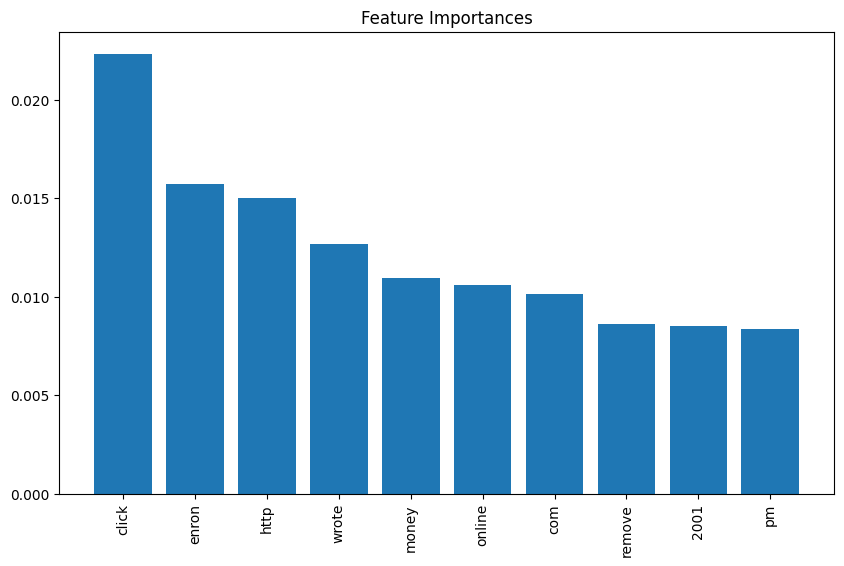

In [24]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


# RandomForestClassifier computes feature importance, which tells how important each feature (in this case, words) is for making predictions.
importances = randomForest.feature_importances_

df = pd.read_csv('../data/Cleaned_Phishing_Email.csv', na_filter=False)

tf = TfidfVectorizer(stop_words="english", max_features=10000)
tf.fit(df["Email Text"])
# Extracts the list of all unique words
feature_names = tf.get_feature_names_out() 

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the top features
print("Top 10 important features:")
for i in range(10):
    print(f"{i+1}. Feature: {feature_names[indices[i]]}, Importance: {importances[indices[i]]}")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), [feature_names[i] for i in indices[:10]], rotation=90)
plt.show()
